# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [18]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [19]:
len(reviews)

25000

In [20]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [21]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [22]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [136]:
import re
import numpy as np
from collections import Counter

def histogramCount(index_array):
    
    selected_label = labels[index_array[0]]
    
    for index in index_array:
        counts = Counter(re.sub("[^\w]", " ",  reviews[index][:80] + "...").split())

    words, values = zip(*counts.items())
    
    return dict(zip(words, values))

In [137]:
negativeCounts = histogramCount([2137, 6267, 5297])
positiveCounts = histogramCount([12816, 21934, 4998])

In [146]:
import pandas as pd

def defDataFrame(sentiment, myData):
    df = pd.DataFrame(myData, index=myData.values(), columns=myData.keys())
    df['Key'] = sentiment
    
    return df

                 Key    a  about  and  both    e  excellent  genius  guy  \
NEGATIVE 1  NEGATIVE  NaN    1.0  NaN   NaN  NaN        NaN     NaN  NaN   
         1  NEGATIVE  NaN    1.0  NaN   NaN  NaN        NaN     NaN  NaN   
         1  NEGATIVE  NaN    1.0  NaN   NaN  NaN        NaN     NaN  NaN   
         1  NEGATIVE  NaN    1.0  NaN   NaN  NaN        NaN     NaN  NaN   
         1  NEGATIVE  NaN    1.0  NaN   NaN  NaN        NaN     NaN  NaN   
         2  NEGATIVE  NaN    1.0  NaN   NaN  NaN        NaN     NaN  NaN   
         2  NEGATIVE  NaN    1.0  NaN   NaN  NaN        NaN     NaN  NaN   
         1  NEGATIVE  NaN    1.0  NaN   NaN  NaN        NaN     NaN  NaN   
         1  NEGATIVE  NaN    1.0  NaN   NaN  NaN        NaN     NaN  NaN   
         1  NEGATIVE  NaN    1.0  NaN   NaN  NaN        NaN     NaN  NaN   
         1  NEGATIVE  NaN    1.0  NaN   NaN  NaN        NaN     NaN  NaN   
         1  NEGATIVE  NaN    1.0  NaN   NaN  NaN        NaN     NaN  NaN   
         1  

/home/victor-hotmart/.conda/envs/sentiment-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Tried to set a label via parameter 'x' in func 'hist' but couldn't find such an argument. 
(This is a programming error, please report to the matplotlib list!)
  # This is added back by InteractiveShellApp.init_path()


TypeError: hist() missing 1 required positional argument: 'x'

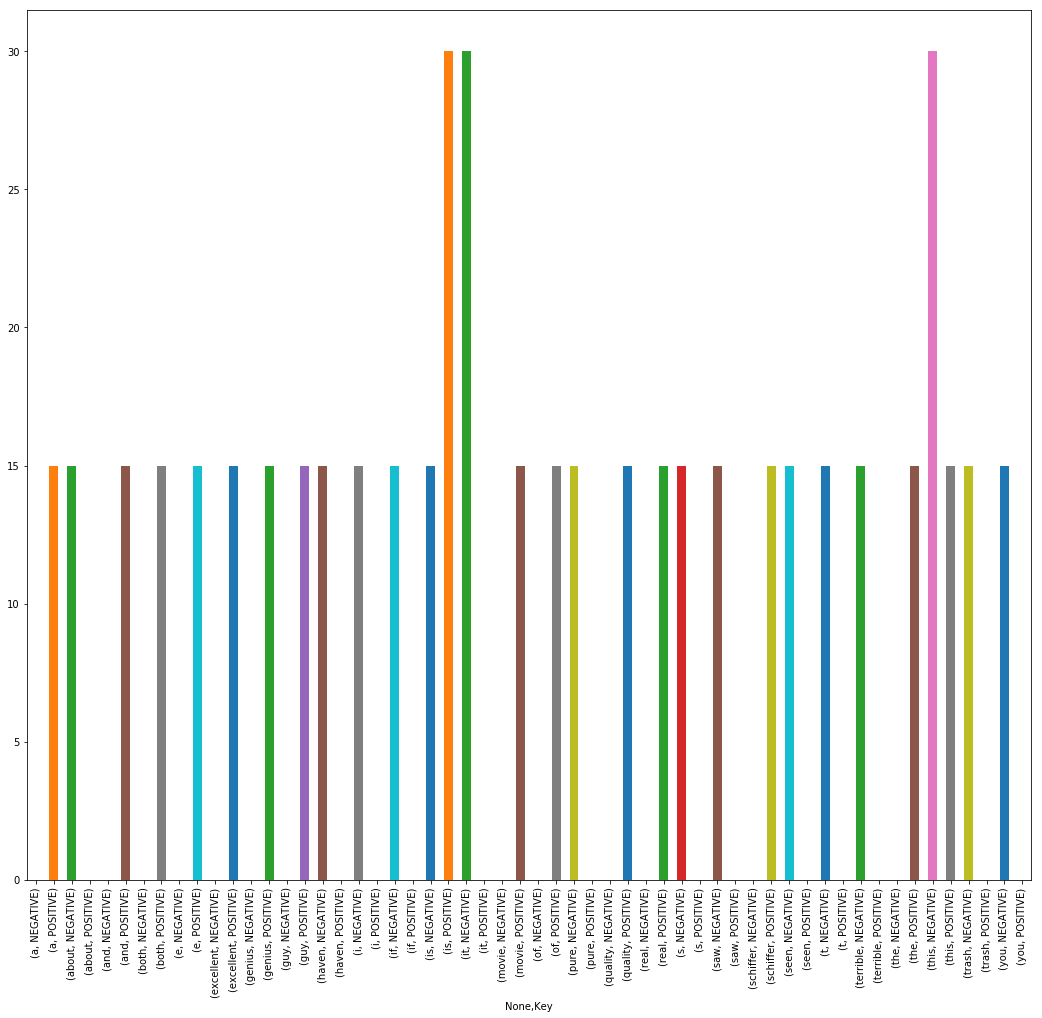

In [167]:

df1 = defDataFrame('NEGATIVE', negativeCounts)
df2 = defDataFrame('POSITIVE', positiveCounts)

DF = pd.concat([df1,df2],keys=['NEGATIVE','POSITIVE'])

print(DF)

DFGroup = DF.groupby('Key')

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar', figsize=(18, 16)).hist(stacked=True)